# Regression, gradient descent

https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931


In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [191]:
X = np.arange(20)
Y = 1.5*X + (2*np.random.random(20) -1)
Y

array([ 0.48465267,  2.25918451,  2.74440292,  3.57034339,  5.63817008,
        7.49068   ,  8.12511206, 10.82982283, 12.05384266, 13.90242542,
       14.27572444, 16.44470453, 18.68316592, 20.23985255, 20.21779549,
       21.64905918, 24.71867146, 25.17061681, 27.43908194, 28.45243723])

## Do the regression and plot

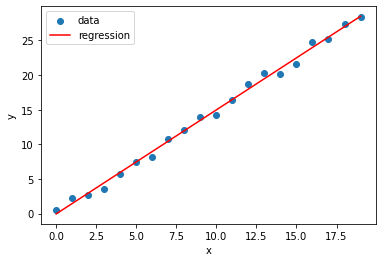

In [195]:
S = stats.linregress(X,Y)

plt.scatter(X,Y,label='data');
plt.plot(X[[0,-1]], S.slope*X[[0,-1]] + S.intercept,'r', label='regression');

plt.legend()
plt.xlabel('x');
plt.ylabel('y');

In [193]:
S.slope, S.intercept

(1.5030430372332224, -0.05942154928446186)

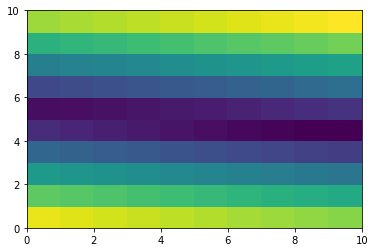

In [156]:
A = np.linspace(2,4,10)
B = np.linspace(-1,1, 10)

M = [ np.linalg.norm((a*X + b) - Y) for a in A
                                    for b in B]
plt.pcolor(np.array(M).reshape(10,10));


In [10]:
import plotly.graph_objects as go

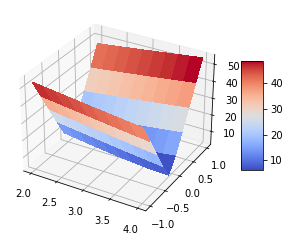

In [196]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
#this is a fix for the gca() deprecation warning
ax = fig.add_subplot(projection='3d')

# Make data.
a, b = np.meshgrid(A,B)

# Plot the surface.
surf = ax.plot_surface(a, b , 
                       np.array(M).reshape(10,10), 
                       cmap=cm.coolwarm,
                       linewidth=0, 
                       antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [158]:
np.array(M).reshape(10,10)[:3]

array([[52.80141081, 51.92611544, 51.05515895, 50.1887672 , 49.32718075,
        48.47065583, 47.61946556, 46.7739012 , 45.93427343, 45.1009138 ],
       [41.79831331, 40.91695136, 40.04085577, 39.17037989, 38.30590686,
        37.44785238, 36.59666794, 35.75284422, 34.91691486, 34.08946063],
       [30.82465935, 29.93364277, 29.04929643, 28.17224851, 27.30320232,
        26.44294683, 25.5923685 , 24.75246499, 23.92436057, 23.10932373]])

---


The problem is to find the best **fit**
ie : $a, b \in \mathbb{R}$ which minimise
$ \| a \vec{x} +  b  - \vec{y} \| $.

If $ \|. \| $ is $ \| x \|_2 = \sqrt{ \sum x_i^2} $ then 
$ Q(a,b) = \| a \vec{x} +  b  - \vec{y} \|^2 $

is a quadratic form.




## So here is a finite elements gradient descent 

In [198]:

delta = .1
vs = delta*np.array([[1,0],[-1,0],[0,1],[0,-1]])
pt = np.array([1,1])

vals = []
coeffs = []

for jj in range(5):
    for _ in range(100):
        val, pt = min([ (np.linalg.norm((rr[0]*X + rr[1]) - Y), rr) for rr in pt + vs ])
        vals.append(val)
        coeffs.append(pt)
        
    vs = delta*vs
    
    
pt

array([ 1.49928, -0.01172])

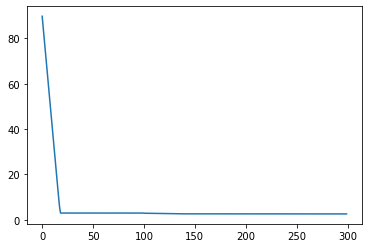

In [160]:
plt.plot(vals);


---

## Funny thing 

It seems that the value of $b$ doesn't matter so much 
the slope is much more important

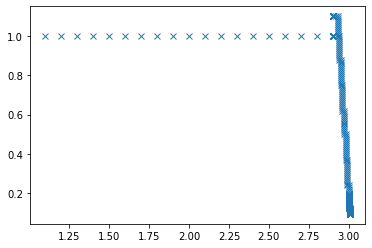

In [173]:
U = np.array(coeffs).T
plt.plot(U[0],U[1],'x');

In [176]:
U[:,-1]

array([3.006713, 0.095613])

so this as OK 
- the slope is good
- but the intercept sucks


In [146]:
S.slope, S.intercept

(3.028437603511071, -0.2967773348695424)